In [1]:
# Paso 1: Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [2]:
! unzip /content/netflix_titles.csv.zip

Archive:  /content/netflix_titles.csv.zip
  inflating: netflix_titles.csv      


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (entrenamiento): 0.364178321022618
Silhouette Score (prueba): 0.35278242596624376


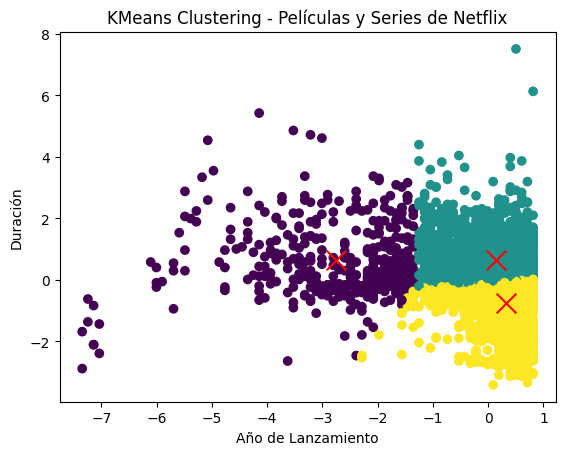

In [18]:
# Paso 2: Cargar el conjunto de datos
# Asume que tienes un DataFrame llamado 'netflix_data' con columnas relevantes
netflix_data = pd.read_csv('/content/netflix_titles.csv')  # Reemplaza con la ubicación real del archivo CSV

# ...
# Preprocessing the 'duration' column to extract the numeric value
netflix_data['duration'] = netflix_data['duration'].str.replace(' min', '')
netflix_data['duration'] = pd.to_numeric(netflix_data['duration'], errors='coerce')  # Convert to numbers and handle errors

# Drop rows with missing values in 'duration' column
netflix_data.dropna(subset=['duration'], inplace=True)

# Rellenar valores faltantes en la columna 'release_year' con la mediana
netflix_data['release_year'].fillna(netflix_data['release_year'].median(), inplace=True)

# Rellenar valores faltantes en las columnas 'rating' y 'country' con valores más comunes
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)
netflix_data['country'].fillna(netflix_data['country'].mode()[0], inplace=True)

# Assuming 'X' contains the relevant features for clustering
X = netflix_data[['release_year', 'duration']]  # Using release year and duration

# ...


# Paso 3: Preprocesamiento de datos (normalización)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Crear el modelo KMeans
num_clusters = 3  # Número de clusters que deseas
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
kmeans.fit(X_train)

# Obtener las etiquetas de los clusters y los centros para los datos de prueba
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)
cluster_centers = kmeans.cluster_centers_

# Evaluación del clustering utilizando el coeficiente de silueta
train_silhouette_score = silhouette_score(X_train, train_cluster_labels)
test_silhouette_score = silhouette_score(X_test, test_cluster_labels)

print(f"Silhouette Score (entrenamiento): {train_silhouette_score}")
print(f"Silhouette Score (prueba): {test_silhouette_score}")

# Visualización de resultados
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, color='red')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración')
plt.title('KMeans Clustering - Películas y Series de Netflix')
plt.show()



In [20]:
!python --version

Python 3.10.12


In [21]:
!pip freeze > requirements.txt